<a href="https://colab.research.google.com/github/szilarderik/MI-laborok/blob/main/BSc_MI_Labor_3_Val%C3%B3sz%C3%ADn%C5%B1s%C3%A9gi_h%C3%A1l%C3%B3k_pgmpy_hallgat%C3%B3i_ipynb_m%C3%A1solata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

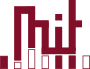 Mesterséges Intelligencia és Rendszertervezés Tanszék, ©2024. BME-MIT, Révy Gábor, Dr. Hullám Gábor  
# **VIMIAC16 - Mesterséges Intelligencia**
## 2024. Őszi félév
## **3. Laborgyakorlat** **- Valószínűségi hálók**

## A labor célja

A labor során a hallgatók egy átfogó gyakorlati példán keresztül ismerhetik meg alapszinten a valószínűségi hálók működését, a hálókban történő következtetést, és annak gyakorlati alkalmazásait. Ezen felül a labor kitér a Bayes-hálók kibővítéseként előállított döntési hálók alkalmazására döntéstámogató és döntéshozó rendszerekben.


# **1. Elméleti háttér**

## 1.1 Valószínűségszámítás alapok, feltételes valószínűség

Valós mesterséges intelligencia alkalmazásokban gyakran végzünk valószínűségi következtetést, amely során valószínűségi változók értékét becsüljük meg megfigyelések illetve előzetesen ismert információk (háttértudás) alapán. A következtetés folyamán megkülönböztetjük egymástól az (1) előzetesen ismert (a priori) valószínűséget, és a (2) más változók értékétől függő feltételes valószínűséget.

Az előzetesen ismert valószínűség egy egyéb változóktól független értéket jelent, például egy ideális világban kockadobásnál $P(Dice=6)=\frac{1}{6}$ (annak az esélye, hogy hatost dobunk) előzetes valószínűségnek számít.

Ezzel szemben hogyha feltételezzük, hogy a kocka valamilyen valószínűséggel cinkelt lehet, akkor bevezethetünk egy új változót, amelynek értéke befolyásolja az előbb felírt valószínűség értékét. Ekkor például a $P(Dice=6|Weighted=yes)=\frac{1}{3}$ valószínűséget **feltételes valószínűségnek**, a $Weighted=yes$ megfigyelésünket pedig **evidenciának** nevezzük.

Így tehát általánosan $P(A)$-val jelöljük az $A$ valószínűségi változóhoz tartozó valószínűséget, és $P(A|B)$-vel $A$ feltételes valószínűségét $B$ evidencia ismeretében, amennyiben $A$ valószínűsége függ $B$-től.

A feltételes valószínűség értékét a két változó együttes valószínűsége $P(A,B)$ és a feltétel előzetes valószínűsége $P(B)$ hányadosaként is felírhatjuk: $P(A|B)=\frac{P(A,B)}{P(B)}$

## 1.2 Valószínűségi változók függetlensége, feltételes függetlenség

Két valószínűségi változó **független** egymástól, amennyiben mindkettőre igaz, hogy lehetséges értékeinek valószínűsége állandó marad a másik értékének ismeretében, bármilyen értéket is vegyen az föl. Például ugyanakkora valószínűséggel dobunk hatost akkor is, ha felhős idő van, és akkor is, ha napos. Általánosan $A$ és $B$ független valószínűségi változók mellett mindig igaz, hogy

$P(A|B)=P(A)$, \\
$P(B|A)=P(B)$ és  
$P(A,B)=P(A)P(B)$.

Amennyiben ezek bármelyike nem teljesül, akkor a valószínűségi változók **összefüggőek**.

<!-- Esetünkben a valószínűségi következtetés során valamilyen esemény valószínűsége alatt annak az éppen ismert evidenciák melletti valószínűségét értjük. Így tehát két változó akkor összefüggő, hogyha valamelyikük egy adott értékének evidenciaként való bevezetése megváltoztatja a másik valószínűségét. -->

Előfordulhat olyan eset is, amikor egy változó ismerete egy másik változó értékét irrelevánssá teszi a vizsgált valószínűségi változó eloszlására való tekintettel.

>Például tegyük fel, hogy egy játékban veszünk részt, ahol bizonyos valószínűséggel lebukhatunk, ha cinkelt kockát használunk. Ekkor ha nem tudjuk, hogy a kocka cinkelt-e, akkor a kockadobás eredménye hatással van arra, hogy lebukunk-e, mert megnövelheti (vagy csökkentheti) a cinkelt kocka valószínűségét. Viszont hogyha tudjuk, hogy a kocka nem cinkelt, akkor bármennyit is dobunk, nem fogunk lebukni, ugyanis nem követtünk el csalást. Ekkor azt mondjuk, hogy a $Weighted$ változó értékének ismeretében a $Caught$ (lebukás) változó független a $Dice$ változótól.

Általánosan, ha $B$ változó $C$ változó ismeretében nem szolgál plusz információval $A$ változó eloszlásáról, vagyis $P(A|B,C)=P(A|C)$ teljesül, akkor azt mondjuk, hogy $A$ és $B$ változók **feltételesen függetlenek** $C$ ismeretében. Formálisan erre az $I(A,B|C)$ jelölést használjuk.

>Az előző példára vetítve ez azt jelenti, hogy $P(Caught|Weighted,Dice)=P(Caught|Weighted)$, tehát $I(Caught,Dice|Weighted)$.

## 1.3 A Bayes-tétel és alkalmazása

Két valószínűségi változó együttes valószínűségét a feltételes valószínűség definiciója alapján az alábbi módon is felírhatjuk: $P(A,B)=P(A|B)P(B)$. Tehát $A$ feltétles valószínűsége $B$ ismeretében szorozva $B$ valószínűségével.
Hasonlóképpen $P(B,A)=P(B|A)P(A)$.

Mivel az együttes valószínűségben a változók lehetséges értékei között fennálló ÉS kapcsolat kommutatív, vagyis $P(A,B)=P(B,A)$, ezért $P(A|B)P(B)=P(B|A)P(A)$.
ekkor a $P(B)$-vel való osztás után az alábbi egyenlőséget kapjuk:

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$


Ezt az azonosságot felfedezője után **Bayes-tétel**nek nevezzük, és nagy jelentőséggel bír a valószínűségi következtetésben. Sokszor ugyanis az a célunk, hogy a rendelkezésre álló adat $D$ alapján tudjunk következtetést levonni a háttérben lévő modellről $M$, amit nem ismerünk $P(M|D)$, és ez így kihívást jelent. Jóval egyszerűbb egy ismert modellt feltételezve meghatározni a megfigyelt adat feltételes valószínűségét $P(D|M)$, amit **likelihoodnak** nevezünk. A Bayes-tétel tehát lehetővé teszi, hogy a megfigyeléseket követő, vagy más néven **a posteriori** valószínűséget $P(M|D)$ kiszámítsuk a likelihood $P(D|M)$ alapján:

$$P(M|D)=\frac{P(D|M)P(M)}{P(D)}$$

Ebben a kontextusban a $P(M)$ kifejezést előzetesen ismert, vagy más néven **a priori** valószínűségnek nevezzük, a $P(D)$ kifejezést pedig normalizációs konstansnak tekintjük és gyakran elhanyagoljuk.


>A Bayes-tételt alkalmazva például a kockadobás esetén a dobott érték, és a két változó előzetes valószínűsége alapján meg tudjuk határozni annak a valószínűségét, hogy a kocka cinkelt, amennyiben hatost dobtunk:
$$P(Weighted=true|Dice=6)=\frac{P(Dice=6|Weighted=true)P(Weighted=true)}{P(Dice=6)}$$
Ekkor a $P(Weighted=true)$ valószínűséget előzetesen ismert, vagy **a priori** valószínűségnek, $P(Dice=6|Weighted=true)$ valószínűséget **likelihoodnak**, a $P(Weighted=true|Dice=6)$ valószínűséget pedig megfigyelés utáni, vagyis **a posteriori** valószínűségnek nevezzük.

## 1.4 "Likelihood" versus "a posteriori valószínűség"

Következtetésnél fontos megkülönböztetni az *a posteriori valószínűség* és a *likelihood* fogalmát.

**Likelihood** alatt azt értjük, amikor ismerjük (vagy legalábbis feltételezzük) a változó eloszlását, és azt szeretnénk tudni, hogy egy konkrét értéke (vagy egy adott tartományba eső érték folytonos esetben) mekkora valószínűséggel fordul elő. Ez a kockadobásnál annak felel meg, hogy már van valamilyen feltételezésünk arról, hogy a kocka cinkelt-e, és tudni szeretnénk, hogy ha ezen feltételezésünk igaz, akkor mekkora eséllyel dobunk hatost. Konkrétabban $P(Dice|Weighted)$ értékére vagyunk kíváncsiak ebben az esetben.

**A posteriori valószínűség** esetén ezzel szemben arra vagyunk kíváncsiak, hogy adott megfigyelés esetén mekkora a valószínűsége annak, hogy azt egy adott eloszlásból kaptuk. Kockadobás esetén ez azt jelenti, hogy tudjuk a kockadobás eredményét, és azt szeretnénk tudni, hogy így mekkora a valószínűsége annak, hogy a kocka cinkelt. Így tehát ezen analógia mentén a $P(Weighted|Dice)$ érték a posteriori valószínűségnek számít.

## 1.5 A valószínűségi hálók

Az előző bekezdésben beláttuk, hogy két változó együttes valószínűségét fel lehet bontani az alábbi módon: $P(A,B)=P(A|B)P(B)$. Ezen felbontás tetszőleges számú változóra történő általánosítását **lánc-szabálynak** nevezzük, amely $n$ darab változóra az alábbi módon alkalmazható:

$$P(X_1,X_2,...,X_n)=P(X_n|X_{n-1},X_{n-2},...,X_1)P(X_{n-1}|X_{n-2},X_{n-3},...,X_1)...P(X_2|X_1)P(X_1)$$

Vagy rövidebben:

$$P(X_1,X_2,...,X_n)=\prod_{i=1}^{n}P(X_i|X_{i-1},...,X_1)$$

<!-- >Amennyiben a modellünk változói között vannak egymástól (feltételesen) független változók (amely gyakorlati alkalmazásokban általában igaz), akkor egy ennél (akár jelentősen) rövidebb, vagyis kevesebb feltételt tartalmazó felbontás is elegendő a modell együttes valószínűségének felírásához. Például egy $A$, $B$, $C$ és $D$ valószínűségi változókat tartalmazó modell együttes valószínűsége alapvetően az alábbi módon bontható fel:
$$P(A,B,C,D)=P(A|B,C,D)P(B|C,D)P(C|D)P(D)$$
Azonban hogyha $A$, $B$ és $C$ változók $D$ ismeretében feltételesen függetlenek, tehát $I(A,B,C|D)$ teljesül, akkor a felbontás jelentősen egyszerűbben is elvégezhető:
$$P(A,B,C,D)=P(A|D)P(B|D)P(C|D)P(D)$$
Gyakorlati alkalmazásokban ez általában azt jelenti, hogy $D$ valószínűségi változó értéke *közvetlenül befolyásolja* a modell másik három változójának valószínűségét.-->

Egy modell változóinak együttes valószínűsége ilyen ábrázolásban viszonylag nehezen átlátható, főleg nagyobb méretű modellek esetén. Ebből adódóan érdemes valamilyen grafikus reprezentációt bevezetnünk, amely könnyebben értelmezhető formában mutatja be a modell változói között fennálló kapcsolatokat. Először is feltételezzük, hogy a modell minden $A$ változójára létezik egy olyan $Parents(A)$ változóhalmaz, amely halmazok esetén az alábbi felbontás (faktorizáció) érvényes felbontása lesz a modell együttes valószínűségének, $n$ darab változót tartalmazó modell esetén:

$$P(X_1,X_2,...,X_n)=\prod_{i=1}^nP(X_i|Parents(X_i))$$

Ekkor a $Parents(A)$ halmaz elemeit $A$ változó **szüleinek**, azon $X$ változókat pedig, amelyekre a $A \in Parents(X)$ pedig $A$ **gyerekeinek** nevezzük (az adott felbontás szerint).


**Bayes-háló (Definíció)**: Azt a körmentes irányított gráfot (Directed Acyclic Graph - DAG), amelynek csomópontjai a modellben található valószínűségi változók, élei pedig a változók közötti függőségi (szülő-gyerek) kapcsolatot reprezentálják úgy, hogy az él a szülőből kiindulva annak gyerekébe mutat, **valószínűségi hálónak**, vagy **Bayes-hálónak** nevezzük, ha minden csomóponthoz tartozik egy feltételes valószínűségi eloszlás, amely a szülők értékei függvényében határozza meg a csomópont által reprezentált valószínűségi változó eloszlását.

>Például a kockadobás esetén $I(Caught,Dice|Weighted)$ feltételes függetlenség miatt érvényes az alábbi felbontás: $P(Caught,Dice,Weighted)=P(Caught|Weighted)P(Dice|Weighted)P(Weighted)$.

>Eszerint a felbontás szerint $Parents(Caught)=\{Weighted\}$, $Parents(Dice)=\{Weighted\}$ és $Parents(Weighted)=\{\}$, így tehát a modell ezen felbontáshoz tartozó Bayes-háló struktúrája a hozzá tartozó **feltételes valószínűségi táblázattal** együtt az alábbi:

<center><img src="https://i.ibb.co/09Gd9P2/Weighted-Dice.png" width="350"></center>

| $Weighted$ | $P(Weighted)$ | \| | $Dice$ | $Weighted$ | $P(Dice|Weighted)$ | \| | $Caught$ | $Weighted$ | $P(Caught|Weighted)$ |
|:----------:|:-------------:|:--:|:------:|:----------:|:------------------:|:--:|:--------:|:----------:|:--------------------:|
| $true$ | $0.1$ | \| | $1$ | $false$ | $1/6$ | \| | $false$ | $false$ | $1$ |
| $false$ | $0.9$ | \| | $2$ | $false$ | $1/6$ | \| | $true$ | $false$ | $0$ |
|  |  | \| | $3$ | $false$ | $1/6$ | \| | $false$ | $true$ | $0.7$ |
|  |  | \| | $4$ | $false$ | $1/6$ | \| | $true$ | $true$ | $0.3$ |
|  |  | \| | $5$ | $false$ | $1/6$ | \| |  |  |  |
|  |  | \| | $6$ | $false$ | $1/6$ | \| |  |  |  |
|  |  | \| | $1$ | $true$ | $2/15$ | \| |  |  |  |
|  |  | \| | $2$ | $true$ | $2/15$ | \| |  |  |  |
|  |  | \| | $3$ | $true$ | $2/15$ | \| |  |  |  |
|  |  | \| | $4$ | $true$ | $2/15$ | \| |  |  |  |
|  |  | \| | $5$ | $true$ | $2/15$ | \| |  |  |  |
|  |  | \| | $6$ | $true$ | $1/3$ | \| |  |  |  |

>Ebben az esetben a feltételes valószínűségi táblázat azzal ekvivalens, mintha felírtuk volna az egyes feltételes valószínűséggel rendelkező valószínűségi változók összes lehetséges értékének valószínűségét a feltételként fennálló változók összes lehetséges értékkombinációja mellett.

>*Megjegyzés:* a fent látható valószínűségi háló egyszerűsített eset, ugyanis a valóságban a dobások sorozata során kijött értékek is nagyban befolyásolják a lebukás valószínűségét, jelen példában azonban elhanyagoljuk az időbeliséget, és feltételezzük, hogy minden körülmények között azonos eséllyel bukunk le egy cinkelt kockával.

## 1.6 Következtetés Bayes-hálókban

Valószínűségi modellek esetén következtetés alatt azt értjük, hogy egy adott változóhalmaz (evidencia) értékének ismeretében kiszámítjuk az ismeretlen értékű valószínűségi változók egy részhalmazának együttes valószínűségét. A következtetés talán legegyszerűbb módja az úgynevezett **felsorolásos egzakt következtetés**.



<!--   Ennek során adott evidenciahalmaz mellett összegezzük az ismeretlen változók lehetséges érték-kombinációinak valószínűségét, amelyből meghatározzuk a keresett együttes valószínűséget. Legyen $\boldsymbol{X}$ az (ismeretlen értékű) célváltozóink halmaza, $\boldsymbol{e}$ az ismert evidenciák értéke, $\boldsymbol{Y}$ pedig az összes többi változót tartalmazó halmaz. Ekkor a keresett $\boldsymbol{X}$ változóhalmaz együttes valószínűségét felírhatjuk az alábbi módon, $\boldsymbol{Y}$ változóhalmaz lehetséges értékei fölött összegezve:   

$$P(\boldsymbol{X}|\boldsymbol{e}) = \alpha P(\boldsymbol{X},\boldsymbol{e}) = \alpha \sum_{\boldsymbol{y} \in \boldsymbol{Y}}P(\boldsymbol{X}, \boldsymbol{e}, \boldsymbol{y})$$

ahol $\alpha$ az úgynevezett normalizációs tényező, amely értékét úgy kell megválasztani, hogy az összes lehetséges (és természetesen nemnegatív) együttes valószínűség értékének összege $1$ legyen.

A következtetés szemléltetése értekében vegyük elő újból a kockadobás példáját. Tegyük fel, hogy a kocka 10% eséllyel cinkelt, a cinkelt kocka megduplázza annak valószínűségét, hogy hatost dobunk, és csalás (tehát cinkelt kocka) esetén 30% eséllyel bukunk le. Ekkor a modell változóinak valószínűségei az alábbiak:

$$P(Weighted=true)=0.1$$
$$P(Weighted=false)=0.9$$
$$P(Dice=1|Weighted=false)=1/6$$
$$P(Dice=2|Weighted=false)=1/6$$
$$P(Dice=3|Weighted=false)=1/6$$
$$P(Dice=4|Weighted=false)=1/6$$
$$P(Dice=5|Weighted=false)=1/6$$
$$P(Dice=6|Weighted=false)=1/6$$
$$P(Dice=1|Weighted=true)=2/15$$
$$P(Dice=2|Weighted=true)=2/15$$
$$P(Dice=3|Weighted=true)=2/15$$
$$P(Dice=4|Weighted=true)=2/15$$
$$P(Dice=5|Weighted=true)=2/15$$
$$P(Dice=6|Weighted=true)=1/3$$
$$P(Caught=false|Weighted=false)=1$$
$$P(Caught=true|Weighted=false)=0$$
$$P(Caught=false|Weighted=true)=0.7$$
$$P(Caught=true|Weighted=true)=0.3$$

Már elkezdtük a játékot, és dobtunk egy hatost, viszont nem tudjuk hogy a kocka cinkelt-e. Azt viszont szeretnénk tudni, hogy mekkora eséllyel bukunk le, a játékból ugyanis akkor is kizárnak bennünket, hogyha csaltunk, de nem tudtunk róla. Ekkor evicenciaként egyetlen változó-értékünk van: $\boldsymbol{e}=\{Dice=6\}$, és a célváltozóink halmaza is egyetlen elemből áll: $\boldsymbol{X}=\{Caught\}$. Az $Y$ halmaz ekkor az egyetlen, eddig említett halmazba sem tartozó változót tartalmazza: $\boldsymbol{Y}=\{Weighted\}$. Ezeket helyettesítsük be a fenti képletbe:

$$P(Caught|Dice=6)=\alpha P(Caught,Dice=6)=\alpha (P(Caught,Dice=6,Weighted=true) + P(Caught,Dice=6,Weighted=false))$$

A "Valószínűségi hálók" bekezdésben említett módszer segítségével a modell változóinak együttes valószínűségét felbonthatjuk az alábbi módon:

$$P(Caught,Dice,Weighted)=P(Caught|Weighted)P(Dice|Weighted)P(Weighted)$$

Amely felbontás segítségével kiszámíthatjuk a lebukás valószínűségét, a fenti értékek behelyettesítése után:

$$P(Caught=true|Dice=6)=\alpha (P(Caught=true,Dice=6,Weighted=true) + P(Caught=true,Dice=6,Weighted=false))=$$

$$=\alpha (P(Caught=true|Weighted=true)P(Dice=6|Weighted=true)P(Weighted=true) + P(Caught=true|Weighted=false)P(Dice=6|Weighted=false)P(Weighted=false))=$$

$$=\alpha (0.3 \cdot \frac{1}{3} \cdot 0.1 + 0 \cdot \frac{1}{6} \cdot 0.9) = 0.01\alpha$$

$\alpha$ értékének meghatározásához ki kell számítanunk $Caught=false$-hoz tartozó értéket is:

$$P(Caught=false|Dice=6)=\alpha (P(Caught=false,Dice=6,Weighted=true) + P(Caught=false,Dice=6,Weighted=false))=$$

$$=\alpha (P(Caught=false|Weighted=true)P(Dice=6|Weighted=true)P(Weighted=true) + P(Caught=false|Weighted=false)P(Dice=6|Weighted=false)P(Weighted=false))=$$

$$=\alpha (0.7 \cdot \frac{1}{3} \cdot 0.1 + 1 \cdot \frac{1}{6} \cdot 0.9) = 0.17\dot 3\alpha$$

Ezekből az $\alpha$ értéke:

$$0.01\alpha + 0.17\dot 3\alpha = 1$$
$$\alpha = 5.\dot 4 \dot 5$$

Végül pedig a valószínűség:

$$P(Caught=true|Dice=6)=0.01\alpha=0.0\dot 5\dot 4 \approx 0.055$$
$$P(Caught=false|Dice=6)=0.17\dot 3\alpha=0.9\dot 4 \dot 5 \approx 0.945$$

amelyre az $\alpha = 5.\dot 4 \dot 5$ választásnak köszönhetően teljesül, hogy

$$P(Caught=true|Dice=6)+P(Caught=false|Dice=6)=1$$

Az előzőek fényében szembetűnő, hogy a feltételes valószínűségek egyenként történő felsorolása egy nem kifejezetten átlátható felírást eredményez. Egy ennél átláthatóbb módszert kínál az úgynevezett feltételes valószínűségi tábla, amely a kockadobásra felírt valószínűségek esetén az alábbi:

| $Weighted$ | $P(Weighted)$ | \| | $Dice$ | $Weighted$ | $P(Dice|Weighted)$ | \| | $Caught$ | $Weighted$ | $P(Caught|Weighted)$ |
|:----------:|:-------------:|:--:|:------:|:----------:|:------------------:|:--:|:--------:|:----------:|:--------------------:|
| $true$ | $0.1$ | \| | $1$ | $false$ | $1/6$ | \| | $false$ | $false$ | $1$ |
| $false$ | $0.9$ | \| | $2$ | $false$ | $1/6$ | \| | $true$ | $false$ | $0$ |
|  |  | \| | $3$ | $false$ | $1/6$ | \| | $false$ | $true$ | $0.7$ |
|  |  | \| | $4$ | $false$ | $1/6$ | \| | $true$ | $true$ | $0.3$ |
|  |  | \| | $5$ | $false$ | $1/6$ | \| |  |  |  |
|  |  | \| | $6$ | $false$ | $1/6$ | \| |  |  |  |
|  |  | \| | $1$ | $true$ | $2/15$ | \| |  |  |  |
|  |  | \| | $2$ | $true$ | $2/15$ | \| |  |  |  |
|  |  | \| | $3$ | $true$ | $2/15$ | \| |  |  |  |
|  |  | \| | $4$ | $true$ | $2/15$ | \| |  |  |  |
|  |  | \| | $5$ | $true$ | $2/15$ | \| |  |  |  |
|  |  | \| | $6$ | $true$ | $1/3$ | \| |  |  |  |

Végül fontos kiemelni, hogy a felsorolásos egzakt következtetés komplexitása többszörösen összekötött hálók (olyan hálók, amelyeknek van két, egynél több irányított úttal összekötött csomópontja) esetén a csomópontok számára exponenciális, így nagyobb hálók esetén nem praktikus a használata. Ennek kiküszöbölésére léteznek egyéb, egzakt következtetést megvalósító, de hatékonyabb algoritmusok, illetve közelítő (tehát nem egzakt) következtetést megvalósító algoritmusok is.-->

Továbbá léteznek egzakt következtetést megvalósító, de hatékonyabb algoritmusok, illetve közelítő (tehát nem egzakt) következtetést megvalósító algoritmusok is.
Ezek részletes leírása megtalálható: Stuart Russell és Peter Norvig Mesterséges Intelligencia - Modern megközelítésben című könyvének [14.4.](https://mialmanach.mit.bme.hu/aima/ch14s04) és [14.5.](https://mialmanach.mit.bme.hu/aima/ch14s05) fejezetében.

---

# **2. Előkészítés**

## 2.1 A keretrendszer

A labor során feltételezzük a Python nyelv, és a Google Colab környezet alapszintű ismeretét. Ezeken felül lényegében két eszközt fogunk használni: a pgmpy python könyvtárat a valószínűségi hálók implementációjához, illetve az ez által használt pygraphviz könyvtárat a megalkotott hálók vizualizációjához.

Ezek telepítéséhez futtassa le az alábbi kódblokkot (a telepítés több percet is igénybe vehet):

In [ ]:
%%capture
!pip install pgmpy==0.1.24
!apt-get install -y graphviz-dev
!pip install pygraphviz

Várja meg, amíg a telepítés befejeződik, majd importálja a kezdetben szükséges könyvtárakat az alábbi kódblokk lefuttatásával:

In [ ]:
%matplotlib inline

import matplotlib as mpl
# Just so the generated figures won't look too ugly
mpl.rcParams['figure.figsize'] = [3, 2]
mpl.rcParams['figure.dpi'] = 200

from matplotlib import pyplot as plt

import pgmpy as pg; print('pg: ' + pg.__version__)
import numpy as np; print('np: ' + np.__version__)

pg: 0.1.24
np: 1.26.4


Amennyiben a telepítés során, vagy a későbbiekben hibát észlel, vagy bármilyen egyéb kérdése van, forduljon bátran a mérésvezetőkhöz.

## 2.2 A modell bemutatása

A modern autóiparban egyre gyakrabban alkalmaznak vezetői fáradtságot detektáló rendszereket. A labor során egy ilyen rendszer implementálása által fogjuk megismerni a Bayes-hálón alapuló valószínűségi következtető rendszerek működését. A változók tekintetében az egyszerűség kedvéért feltételezzük, hogy a rendszer már előzetesen feldolgozott, magas szintű információt kap, így a bemenetek mindegyike diszkrét, többségük bináris.

A modellben bevezetendő valószínűségi változók az alábbiak:

*   Az út hossza (**LengthOfDrive**): Bináris változó, értéke *long*, hogyha a vezető által egyhuzamban megtett út hossza egy adott határértéknél magasabb. Ellenkező esetben *short*.
*   Forgalmi dugó (**TrafficJam**): Értéke *jammed*, hogyha az út során a sofőr jelentős dugóba kerül. Ellenkező esetben *clear*.
*   Szívverés (**HeartRate**): Értéke *low*, hogyha a sofőr pulzusa az alvás során jellemző tartományban van. Ellenkező esetben *normal*.
 *  A pulzus mérhető például egy, a kormánykeréken elhelyezett szenzor segítségével.
*   Sávtartás (**LaneStability**): Attól függően, hogy a sofőr tartja a sávot, enyhén instabilan vezet, vagy éppen elhagyja a sávot, az értéke lehet *straight*, *slalom* vagy *leaving*.
*   Szemek (**Eyes**): Értéke lehet *open*, *blink* vagy *closed* attól függően, hogy a sofőr szeme folyamatosan nyitva van, gyakran pislog, vagy teljesen csukva van.
 *  A szemek viselkedése egy, a sofőrrel szemben elhelyezett kamera képéből kinyerhető valamilyen képfeldolgozó modell segítségével.
*   Fáradtság (**Fatigue**): Értéke *fatigued*, hogyha a vezető fáradtsága annyira magas, hogy nagy valószínűséggel elalszik a volánnál. Ellenkező esetben kipihent, vagyis *rested*.

A továbbakban a kompaktság érdekében képletek esetén az alábbi jelölést alkalmazzuk a változókra:

| Változó neve | Jelölés |
| :---: | :---: |
| **LengthOfDrive** | $LOD$ |
| **TrafficJam** | $TJ$ |
| **HeartRate** | $HR$ |
| **LaneStability** | $LS$ |
| **Eyes** | $E$ |
| **Fatigue** | $F$ |

Könnyen belátható, hogy az első két változó (**LengthOfDrive**, **TrafficJam**) a fáradtságnak (**Fatigue**) okai, az utánuk következő három pedig (**HeartRate**,**LaneStability**, **Eyes**) következményei. Ebből adódóan a változók együttes valószínűsége felírható az alábbi módon:

$$P(LOD,TJ,HR,LS,E,F)=P(LOD)P(TJ)P(F|LOD,TJ)P(HR|F)P(LS|F)P(E|F)$$

A változók valószínűségi eloszlását pedig az alábbi **feltételes valószínűségi táblázat** adja meg:

|  $LOD$  	| $P(LOD)$ 	| \| 	|   $TJ$  	| $P(TJ)$ 	| \| 	|  $LOD$  	|   $TJ$  	|   $F$   	| $P(F|LOD,TJ)$ 	| \| 	|   $F$   	|  $HR$  	| $P(HR|F)$ 	| \| 	|   $F$   	|    $LS$    	| $P(LS|F)$ 	| \| 	|   $F$   	|    $E$   	| $P(E|F)$ 	|
|:-------:	|:--------:	|:--:	|:-------:	|:-------:	|:--:	|:-------:	|:-------:	|:-------:	|:-------------:	|:--:	|:-------:	|:-------:	|:----------:	|:--:	|:-------:	|:----------:	|:---------:	|:--:	|:-------:	|:--------:	|:--------:	|
| $long$  	|   $0.1$  	| \| 	| $jammed$  	| $0.3$   	| \| 	| $long$  	| $jammed$  	| $fatigued$  	| $0.65$        	| \| 	| $fatigued$  	| $low$  	| $0.8$      	| \| 	| $fatigued$  	| $straight$ 	| $0.89$    	| \| 	| $fatigued$  	| $open$   	| $0.1$    	|
| $short$ 	|   $0.9$  	| \| 	| $clear$ 	| $0.7$   	| \| 	| $long$  	| $jammed$  	| $rested$ 	| $0.35$        	| \| 	| $fatigued$  	| $normal$ 	| $0.2$      	| \| 	| $fatigued$  	| $slalom$   	| $0.1$     	| \| 	| $fatigued$  	| $blink$  	| $0.85$   	|
|         	|          	| \| 	|         	|         	| \| 	| $long$  	| $clear$ 	| $fatigued$  	| $0.45$        	| \| 	| $rested$ 	| $low$  	| $0.3$      	| \| 	| $fatigued$  	| $leaving$  	| $0.01$    	| \| 	| $fatigued$  	| $closed$ 	| $0.05$   	|
|         	|          	| \| 	|         	|         	| \| 	| $long$  	| $clear$ 	| $rested$ 	| $0.55$        	| \| 	| $rested$ 	| $normal$ 	| $0.7$      	| \| 	| $rested$ 	| $straight$ 	| $0.99$    	| \| 	| $rested$ 	| $open$   	| $0.94$   	|
|         	|          	| \| 	|         	|         	| \| 	| $short$ 	| $jammed$  	| $fatigued$  	| $0.55$        	| \| 	|         	|         	|            	| \| 	| $rested$ 	| $slalom$   	| $0.01$    	| \| 	| $rested$ 	| $blink$  	| $0.05$   	|
|         	|          	| \| 	|         	|         	| \| 	| $short$ 	| $jammed$  	| $rested$ 	| $0.45$        	| \| 	|         	|         	|            	| \| 	| $rested$ 	| $leaving$  	| $0$       	| \| 	| $rested$ 	| $closed$ 	| $0.01$   	|
|         	|          	| \| 	|         	|         	| \| 	| $short$ 	| $clear$ 	| $fatigued$  	| $0.35$        	| \| 	|         	|         	|            	| \| 	|         	|            	|           	| \| 	|         	|          	|          	|
|         	|          	| \| 	|         	|         	| \| 	| $short$ 	| $clear$ 	| $rested$ 	| $0.65$        	| \| 	|         	|         	|            	| \| 	|         	|            	|           	| \| 	|         	|          	|          	|

## 2.3 A modell implementációja

Kezdetben hozzunk létre egy Bayes-hálót a **LengthOfDrive**, **TrafficJam**, **Fatigue** és **HeartRate** változókból. Ehhez először inicializálja a változók eloszlásait (feltételes valószínűségi táblák, azaz `TabularCPD`-k formájában) az alábbi kódblokk lefuttatásával:

In [ ]:
from pgmpy.factors.discrete import TabularCPD

lengthOfDrive = TabularCPD("LengthOfDrive", 2, [[0.1], [0.9]],
                           state_names={"LengthOfDrive": ["long", "short"]})

trafficJam = TabularCPD("TrafficJam", 2, [[0.3], [0.7]],
                        state_names={"TrafficJam": ["jammed", "clear"]})

fatigue = TabularCPD("Fatigue", 2, [[0.65, 0.45, 0.55, 0.35],
                                    [0.35, 0.55, 0.45, 0.65]],
                     evidence=["LengthOfDrive", "TrafficJam"],
                     evidence_card=[2, 2],
                     state_names={
                         "Fatigue": ["fatigued", "rested"],
                         "LengthOfDrive": ["long", "short"],
                         "TrafficJam": ["jammed", "clear"]
                     })

heartRate = TabularCPD("HeartRate", 2, [[0.8, 0.3],
                                        [0.2, 0.7]],
                       evidence=["Fatigue"],
                       evidence_card=[2],
                       state_names={
                           "HeartRate": ["low", "normal"],
                           "Fatigue": ["fatigued", "rested"]
                       })

Mint látható, a pgmpy könyvtárban az önálló eloszlások (a kódban `TabularCPD`) meghatározása során a feltételes valószínűségeket mátrixos formában kell megadni, ahol a mátrix oszlopai a szülőváltozó(k) érték-kombinációinak, sorai pedig az adott változó a bemeneti értékkombináció függvényében vett eloszlását (értékeinek valószínűségeit) adják. Evidens, hogy utóbbi ok miatt minden oszlop összege pontosan $1$ kell, hogy legyen. Ezen kívül a változó meghatározásához meg kell adni annak nevét, kardinalitását és lehetséges értékeit, illetve minden szülője esetében meg kell adni ugyanezt. További információ és példák a pgmpy [dokumentációjában](https://pgmpy.org/factors/discrete.html#module-pgmpy.factors.discrete.CPD) láthatók.

A változók és azok eloszlásainak definiálását követően példányosítsunk egy hálót, majd adjuk hozzá a változók eloszlásait tartalmazó CPD-ket:

In [ ]:
from pgmpy.models import BayesianNetwork

# Initialize a new Bayesian network
partialModel = BayesianNetwork([("LengthOfDrive", "Fatigue"),
                                ("TrafficJam", "Fatigue"),
                                ("Fatigue", "HeartRate")])

# Add the previously defined conditional probability tables to the model
partialModel.add_cpds(lengthOfDrive, trafficJam, fatigue, heartRate)

Az így elkészült modell struktúráját gráf formájában kirajzolhatjuk az alább definiált, `pygraphviz` könyvtárra épülő `plot_model` függvény segítségével:

In [ ]:
from pgmpy.base import DAG
import tempfile

def plot_model(model: DAG):
  model_gvz = model.to_graphviz()
  with tempfile.NamedTemporaryFile() as tf:
    model_gvz.draw(tf.name, format='png', prog='dot')
    img = mpl.image.imread(tf.name)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

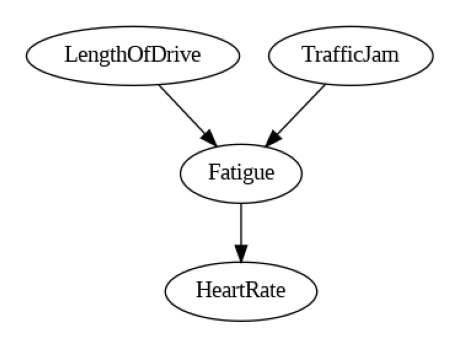

In [ ]:
plot_model(partialModel)

# **3. Gyakorló feladatok**

## 1. Feladat: a modell kiegészítése
Egészítse ki az alábbi kódot úgy, hogy a modell tartalmazza a **LaneStability** és **Eyes** valószínűségi változókat is, a modell bemutatásában szereplő elnevezési konvenciónak, és feltételes valószínűségeknek megfelelően, majd futtassa le az elkészült kódblokkot:

> Itt fontos megfigyelni, hogy a létrehozandó változóknak $3$ lehetséges értéke van (Tehát 'straight', 'slalom' és 'leaving' értékek a **LaneStability** változónál, illetve 'open', 'blink', 'closed' értékek az **Eyes** esetén), emiatt a feltételes valószínűségeket leíró mátrixok **három sort tartalmaznak** az eddigi változóknál látott kettő sor helyett.

**Fontos:** A két változó eloszlásának az arra kijelölt helyen történő meghatározásán felül **egyéb változtatást ne hajtson végre a már meglévő kódon!**



In [ ]:
# TASK: Define the ConditionalProbabilityTables 'laneStability' and 'eyes' here
# laneStability = ...
# eyes = ...

# SOLUTION:
################################################################################
# laneStability = ...
# eyes = ...
################################################################################
laneStability = TabularCPD("LaneStability", 3, [[0.89, 0.99],
                                        [0.1, 0.01], [0.01, 0]],
                       evidence=["Fatigue"],
                       evidence_card=[2],
                       state_names={
                           "LaneStability": ["straight", "slalom", "leaving"],
                           "Fatigue": ["fatigued", "rested"]
                       })

eyes = TabularCPD("Eyes", 3, [[0.1, 0.94],
                                        [0.85, 0.05], [0.05, 0.01]],
                       evidence=["Fatigue"],
                       evidence_card=[2],
                       state_names={
                           "Eyes": ["open", "blink", "closed"],
                           "Fatigue": ["fatigued", "rested"]
                       })


model = BayesianNetwork([("LengthOfDrive", "Fatigue"),
                         ("TrafficJam", "Fatigue"),
                         ("Fatigue", "HeartRate"),
                         ("Fatigue", "LaneStability"),
                         ("Fatigue", "Eyes")])

model.add_cpds(lengthOfDrive, trafficJam, fatigue, heartRate, laneStability, eyes)

Az elkészült megoldást az előzőhöz hasonlóan egy *plot()* hívással tekinthetjük meg:

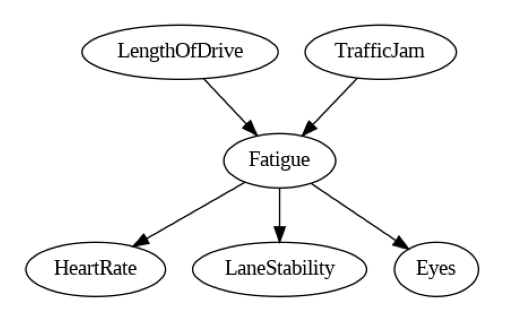

In [ ]:
plot_model(model)

Hogyha a megoldás helyes, akkor a **LaneStability** és **Eyes** nevű csomópontok a **Fatigue** csomópont gyerekeiként szerepelnek.

## 2. Feladat: következtetés a modellben

A valószínűségi hálókban végrehajtott következtetés során az ismeretlen változók lehetséges értékeinek valószínűségére vagyunk kíváncsiak, a már megfigyelt (és így ismert) változók értékeinek függvényében.

A pgmpy keretrendszerben valamely következtető (esetünkben `VariableElimination`) [`query`](https://pgmpy.org/exact_infer/ve.html#pgmpy.inference.ExactInference.VariableElimination.query) függvényének segítségével hajthatunk végre következtetést, amelynél a már ismert változók értékét egy, azok nevével indexelt dictionary-ként adhatjuk meg, visszatérési értékként pedig a lekérdezett változók eloszlását kapjuk meg a megadott evidenciák függvényében.

Kezdetben feltételezzük, hogy a változók egyike sem ismert. Ekkor a változók lehetséges értékeinek aktuális valószínűségét egy üres dictionary-vel végzett `query` hívással kérdezhetjük le, majd írassuk is ki az eredményt egy egyszerű `print`-hívás segítségével:

In [ ]:
from pgmpy.inference import VariableElimination
inference = VariableElimination(model)

evidence_set = {}

query_result = inference.query(variables=["Fatigue"],
                               evidence=evidence_set)
print(query_result)

+-------------------+----------------+
| Fatigue           |   phi(Fatigue) |
+===================+================+
| Fatigue(fatigued) |         0.4200 |
+-------------------+----------------+
| Fatigue(rested)   |         0.5800 |
+-------------------+----------------+


Az eredményből láthatjuk, hogy amennyiben nincs semmilyen előzetes tudásunk, akkor a fáradtság valószínűsége $0.42$.

Tegyük fel, hogy a GPS szerint hosszú ideje úton van a sofőr, viszont a tervezett útvonalon nincs forgalmi dugó. Ekkor a hiányzó változók valószínűségét az alábbi módon kaphatjuk meg:

In [ ]:
evidence_set = {"LengthOfDrive": "long",
                "TrafficJam":    "clear"}

query_result = inference.query(variables=["Fatigue"],
                               evidence=evidence_set)
print(query_result)

+-------------------+----------------+
| Fatigue           |   phi(Fatigue) |
+===================+================+
| Fatigue(fatigued) |         0.4500 |
+-------------------+----------------+
| Fatigue(rested)   |         0.5500 |
+-------------------+----------------+


Ezen eredményből megfigyelhetjük, hogy a fáradtság valószínűsége beállt a feltételes valószínűségi táblában a **LengthOfDrive**='long' és **TrafficJam**='clear' evidenciákhoz meghatározott, $0.45$-ös értékre. Ez azonban nem jelenti azt, hogy a modell jelenleg ismeretlen változóinak evidenciaként történő bevezetése ne változtathatna a valószínűségén, Bayes-hálókban ugyanis egy változó a szüleinek ismeretében csak a nem-leszármazottaitól válik függetlenné, a maradék három csomópont pedig mind a **Fatigue** változónak leszármazottja.

Feltételezzük, hogy a kormányban elhelyezett szenzor azt jelzi, hogy a sofőr pulzusa normális, nincs közel az alvás során mérhető értékhez. Ekkor a valószínűségek az alábbi módon alakulnak:

In [ ]:
evidence_set = {"LengthOfDrive": "long",
                "TrafficJam":    "clear",
                "HeartRate":     "normal"}

query_result = inference.query(variables=["Fatigue"],
                               evidence=evidence_set)
print(query_result)

+-------------------+----------------+
| Fatigue           |   phi(Fatigue) |
+===================+================+
| Fatigue(fatigued) |         0.1895 |
+-------------------+----------------+
| Fatigue(rested)   |         0.8105 |
+-------------------+----------------+


Már a feltételes valószínűségi táblában meghatározott értékekből is látható, hogy a **HeartRate** viszonylag erősen korrelál a **Fatigue** változóval. Ebből adódóan nem meglepő, hogy a fáradtság valószínűségét ezen változó 'normal'-ra állítása $0.35$-ről ~$0.19$-re csökkentette, ugyanis az erős evidenciának számít ezen változó 'rested' értéke mellett.

Tegyük fel, hogy a vezető arcát néző kamera szerint a sofőr gyakran csukja be a szemét rövidebb időre.
Módosítsa, majd futtassa le az alábbi kódblokkot úgy, hogy a meglévő három evidencia mellett a következtetés tartalmazza az **Eyes**='blink' evidenciát is:

In [ ]:
# TODO: Do the inference with the following values:
#       - LengthOfDrive = long
#       - TrafficJam = clear
#       - HeartRate = normal
#       - Eyes = blink

# evidence_set = ...

# SOLUTION:
################################################################################
# evidence_set = ...
################################################################################
evidence_set = {"LengthOfDrive": "long",
                "TrafficJam":    "clear",
                "HeartRate":     "normal",
                "Eyes": "blink"}


query_result = inference.query(variables=["Fatigue"],
                               evidence=evidence_set)
print(query_result)

+-------------------+----------------+
| Fatigue           |   phi(Fatigue) |
+===================+================+
| Fatigue(fatigued) |         0.7990 |
+-------------------+----------------+
| Fatigue(rested)   |         0.2010 |
+-------------------+----------------+


Amennyiben a következtetést megfelelően hajtotta végre, úgy a **Fatigue** változó valószínűségeként ~$0.8$-at kellett kapjon. Ha figyelembe vesszük, hogy a feltételes valószínűségi tábla szerint fáradtság esetén a gyakori pislogás esélye $0.85$, míg fáradtság hiányában csupán ~$0.05$, akkor láthatjuk, hogy az **Eyes** változó még erősebb korrelációt mutat a fáradtsággal, mint a **HeartRate** változó. Ebből adódóan érthető, hogy a fáradtság valószínűségét ezen változó evidenciaként történő bevezetése ~$0.19$-ről ~$0.8$-ra növelte.

Végül pedig tegyük fel, hogy az autó külső kamerája szerint a sofőr elkezdte elhagyni a sávot. Vezesse be az alábbi kódblokkban az eddigi evidenciák mellé a **LaneStability**='leaving' értéket, majd futtassa le a blokkot:

In [ ]:
# TODO: Do the inference with the following values:
#       - LengthOfDrive = long
#       - TrafficJam = clear
#       - HeartRate = normal
#       - Eyes = blink
#       - LaneStability = leaving

# evidence_set = ...

# SOLUTION:
################################################################################
# evidence_set = ...
################################################################################

evidence_set = {"LengthOfDrive": "long",
                "TrafficJam":    "clear",
                "HeartRate":     "normal",
                "Eyes": "blink",
                "LaneStability": "leaving"}

query_result = inference.query(variables=["Fatigue"],
                               evidence=evidence_set)
print(query_result)

+-------------------+----------------+
| Fatigue           |   phi(Fatigue) |
+===================+================+
| Fatigue(fatigued) |         1.0000 |
+-------------------+----------------+
| Fatigue(rested)   |         0.0000 |
+-------------------+----------------+


Ha jól hajtotta végre a következtetést, akkor a fáradtság valószínűsége $1$. Ez a jelenség viszonylag ritka a valószínűségszámításban, és a valószínűségi következtetésben, és ha be is vezetünk $1$ valószínűségű változó-értéket, akkor azt általában evidenciaként szoktuk értelmezni. Ha azonban alaposabban megfigyeljük a feltételes valószínűségi táblázatot, akkor láthatjuk, hogy a **LaneStability**='leaving' érték valószínűsége $0$ abban az esetben, hogyha a fáradtság értéke igaz, és nullánál nagyobb, hogyha nem. Ez röviden azt jelenti, hogy a **LaneStability**='leaving' érték mellett kizárt, hogy a fáradtság értéke hamis legyen, így tehát mindenképp teljesül, hogy **Fatigue**='fatigued'. Lényegében ugyanezt az állítást tükrözi a következtetés során kapott $P(Fatigue=fatigued|LaneStability=leaving)=1$ valószínűség is.

## 3. Feladat: döntési hálók
A valószínűségi hálókat leggyakrabban döntéshozó, vagy döntéstámogató rendszerekben szokás használni, ahol egy (vagy több) célváltozó ismert evidenciák melletti valószínűsége alapján szeretnénk meghatározni a lehetséges döntések közül a lehető legjobbat. Ennek végráhajtásához a Bayes-hálót ki kell bővítenünk úgy, hogy meghatározzuk a lehetséges döntéseket, majd hasznosság (vagy veszteség) értékeket rendelünk a célváltozó értékei és a lehetséges döntések összes kombinációjához. Az így kibővített valószínűségi hálót **döntési hálónak** nevezzük.

Döntési hálókban egy adott döntés várható hasznossága (vagy vesztesége) alatt a célváltozó értékeire az adott döntés-érték párhoz meghatározott hasznosság (vagy veszteség) értékét értjük a változó-érték aktuális valószínűségével megszorozva, a szorzatot a célváltozó értékei fölött összegezve. Egy adott pillanatban mindig a legnagyobb várható hasznosságú (vagy legkisebb várható veszteségű) döntést érdemes meghozni.

Tegyük fel, hogy kétféle módon tudjuk figyelmeztetni a sofőrt: egy, a kezelőfelületen megjelenő értesítéssel, vagy egy nagy hangerejű figyelmeztető hangjelzéssel. Így tehát minden időpillanatban három lehetséges döntésből kell választanunk: ne csináljunk semmit (*Idle*), jelenítsünk meg egy értesítést a kezelőfelületen (*Notify*), vagy szólaltassunk meg egy hangos figyelmeztetést (*Warning*). Egyértelmű, hogy a legrosszabb eshetőség, hogyha a sofőr elalszik a volánnál, és semmilyen módon nem figyelmeztetjük. Emellett viszont az sem jó, hogyha túlzottan gyakran küldünk figyelmeztetést, ebben az esetben ugyanis a rendszer működése zavaró lehet a sofőr számára, és fennáll az esélye, hogy kikapcsolja azt, ezen felül pedig az is előfordulhat, hogy egy nagy hangerejű hangjelzés megzavarja a sofőrt a vezetésben. Ebből kiindulva vezessük be az alábbi hasznosság értékeket a célváltozó értékeinek, és a döntéseknek lehetséges kombinációira:

| $Fatigue$ | $Alarm$ | $U(Alarm|Fatigue)$ |
|:---------:|:---------:|:------------------:|
| $fatigued$ | $Idle$ | $-300$ |
| $fatigued$ | $Notify$ | $10$ |
| $fatigued$ | $Warning$ | $100$ |
| $rested$ | $Idle$ | $10$ |
| $rested$ | $Notify$ | $-50$ |
| $rested$ | $Warning$ | $-100$ |

A pgmpy keretrendszer jelen állapotában nem támogatja a döntési hálók létrehozását, így definiálnunk kell egy függvényt, amely meghatározza a lehetséges döntések aktuális hasznosságértékeit a valószínűségi hálón végzett következtetés eredménye alapján. Ezt az alábbi kódblokk lefuttatásával tehetjük meg:

In [ ]:
from pgmpy.factors.discrete import DiscreteFactor

utilities = {
    ("fatigued", "Idle"):    -300,
    ("fatigued", "Notify"):   10,
    ("fatigued", "Warning"):  100,
    ("rested",   "Idle"):     10,
    ("rested",   "Notify"):  -50,
    ("rested",   "Warning"): -100
}

def print_utility_values(query_result: DiscreteFactor):
  """
    This function computes and prints the utilities of the possible actions,
    based on the probability of the Fatigue variable.
  """
  expected_utilities = dict()
  for key in utilities.keys():
    # Take the probability for the corresponding value of the 'Fatigue' variable
    prob = query_result.get_value(Fatigue=key[0])
    try:
      # If we've seen this decision before, correct the expected utility.
      expected_utilities[key[1]] += prob * utilities[key]
    except KeyError:
      # Otherwise create a new value for this decision.
      expected_utilities[key[1]] = prob * utilities[key]

  # Get the best decision based on the expected utility values, then print it.
  best_decision = list(expected_utilities.keys())[0]
  for key in expected_utilities.keys():
    print(f"{(key + ':').ljust(8)} {expected_utilities[key]:.2f}")
    if expected_utilities[best_decision] < expected_utilities[key]:
      best_decision = key
  print("The current optimal decision is: " + best_decision)

Tegyük fel, hogy nincs forgalmi dugó, nincs hosszú ideje úton a sofőr, és a pulzusa is normális (tehát minden rendben van). Ebben a szituációban a lehetséges döntések hasznosságát és a pillanatnyi optimális döntést az alábbi módon írathatjuk ki:

In [ ]:
evidence_set = {"TrafficJam":    "clear",
                "LengthOfDrive": "short",
                "HeartRate":     "normal"}

query_result = inference.query(variables=["Fatigue"],
                               evidence=evidence_set)
print_utility_values(query_result)

Idle:    -31.33
Notify:  -42.00
The current optimal decision is: Idle


Látható, hogy egy ehhez hasonló, normálisnak mondható szituációban a modell szerint nem érdemes semmilyen figyelmeztetést eszközölni, ugyanis a sofőr nagy valószínűséggel nem álmos.

Az alábbi két kódblokkban definiáljon egy-egy olyan (legalább 4 darab evidenciából álló) bemenetet, amelyre a modell a '*Notify*' illetve a '*Warning*' cselekvést javasolja, majd futtassa le a kódblokkokat:

In [ ]:
# TODO: Define an input here, to which the model suggests the 'Notify' action:

# evidence_set = ...

# SOLUTION: (example)
################################################################################
# evidence_set = ...
################################################################################
evidence_set = {"TrafficJam":    "jammed",
                "LengthOfDrive": "long",
                "HeartRate":     "low",
                "Eyes": "open"}

query_result = inference.query(variables=["Fatigue"],
                               evidence=evidence_set)
print_utility_values(query_result)

Idle:    -96.97
Notify:  -29.30
The current optimal decision is: Notify


In [ ]:
# TODO: Define an input here, to which the model suggests the 'Warning' action:

# evidence_set = ...

# SOLUTION: (example)
################################################################################
# evidence_set = ...
################################################################################
evidence_set = {"TrafficJam":    "jammed",
                "LengthOfDrive": "long",
                "HeartRate":     "low",
                "Eyes": "blink"}


query_result = inference.query(variables=["Fatigue"],
                               evidence=evidence_set)
print_utility_values(query_result)

Idle:    -296.36
Notify:  9.30
The current optimal decision is: Warning


# **4. Alkalmazás egészségügyi környezetben**

A következőkben egy valós problémát fogunk megoldani szakértői tudás és paramétertanulás felhasználásával, amely a tuberkolózis és a tüdőrák diagnosztizálásához kapcsolódik.

Tegyük fel, hogy az alábbi öt, bináris (igen/nem) értékű változót tudjuk megfigyelni az orvoshoz forduló betegeknél:
- Járt-e a közelmúltban Ázsiában? (*asia*)
- Dohányzik? (*smoke*)
- Tapasztal hurutos köhögést? (*bronc*)
- Tapasztal légszomjat? (*dysp*)
- Látszik-e bármilyen elváltozás a tüdőröntgenen? (*xray*)

Emellett definiáljunk három, szintén bináris értékű változót, amelyek a diagnózist írják le:
- Tuberkolózis (*tub*)
- Tüdőrák (*lung*)
- Legalább egyik igaz a fenti két diagnózis közül (*illness*)

A változókról az alábbi tényeket ismerjük:
- A tuberkolózis (*tub*) valószínűségére hatással van, hogy járt-e a beteg Ázsiában vagy sem (*asia*).
- A dohányzás (*smoke*) hurutos köhögést (*bronc*) és tüdőrákot (*lung*) okozhat.
- Az *illness* változó értéke a *tub* és *lung* változók közötti VAGY kapcsolattal adódik.
- Mindkét betegség (*illness*) okozhat látható elváltozást a tüdőröntgenen (*xray*).
- Mindkét betegség (*illness*) és a hurutos köhögés (*bronc*) is okozhat légszomjat (*dysp*).

A fenti tények alapján pedig az alábbi oksági struktúrát határoztuk meg:

<img src="https://share.mit.bme.hu/index.php/s/KqEPgGoX8nx6NcN/download/asia_bnet.png" alt="asia_bnet" width="250"/>

>Itt a teljesség kedvéért érdemes hozzátenni, hogy egy klinikai alkalmazásban használt valószínűségi háló jellemzően ennél sokkal több tényezőt figyelembe vesz, és akár több száz csomópontot is tartalmazhat, ebben a feladatban az implementáció megkönnyítése végett egy jelentősen leegyszerűsített modellt használunk.

Nyilvánvaló, hogy a diagnózis nagy bizonyossággal történő meghatározása költséges és időigényes eljárások által valósítható meg, amelyek a beteg számára is számos kellemetlenséggel járnak (pl. szövetminta hörgőtükrözéssel), emiatt fontos a felsorolt diagnózisok valószínűségének minél pontosabb előzetes becslése a fenti, könnyen megfigyelhető változók értéke alapján.

A célunk egy olyan valószínűségi háló megalkotása, amely a fenti oksági struktúrát felhasználva meg tudja becsülni annak a valószínűségét, hogy a beteg szenved-e a fenti két betegség valamelyikében (más szavakkal élve: az *illness* változó értékét szeretnénk becsülni).

Ehhez rendelkezésünkre áll egy nagyméretű adathalmaz, amely a fenti változókat tartalmazza diagnosztizált betegeknél. Erre azért van szükségünk, mert pusztán a változók közötti oksági struktúrát ismerjük, azok együttes eloszlását nem.

Ehhez mindenek előtt állítsuk vissza a környezetet, majd töltsük be a rendelkezésre álló adatot:

In [ ]:
%reset -f
import pandas as pd
import numpy as np

pulmonary_dataset = pd.read_csv("https://share.mit.bme.hu/index.php/s/fQXekNakEHH3C7c/download/pulmonary_sample.csv")
pulmonary_dataset

,asia,tub,smoke,lung,bronc,illness,xray,dysp
0,no,no,yes,no,yes,no,no,yes
1,no,no,yes,no,yes,no,no,yes
2,no,no,no,no,yes,no,no,yes
3,no,no,yes,no,no,no,no,yes
4,no,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
49995,no,no,no,no,no,no,no,no
49996,no,no,yes,no,yes,no,no,yes
49997,no,no,no,no,yes,no,yes,no
49998,no,no,no,no,no,no,no,no


# **5. Feladatbeadás**

A feladat megoldásához készítsen egy függvényt, ami definiálja a Bayes-háló oksági struktúráját a fenti ábra alapján, majd a kapott adatokból megbecsüli a háló paramétereit, és a kapott bemeneti evidenciákra (tesztadat) visszaadja az *illness* változó **yes** értékének valószínűségeit!

**Ezt a `lung_predictor.py` fájl alább látható szkeletonjának módosításával valósítsa meg!**

A szkeletonban található `predict` függvényt módosítsa úgy, hogy az hozzon létre egy, a fenti struktúrának megfelelő, *parametrizálatlan* Bayes-hálót, majd becsülje meg a benne található változók együttes eloszlását a kapott adat (`data_train`) segítségével, végül térjen vissza a szintén paraméterként kapott teszthalmazra (`data_test`) számolt *illness* változó *yes* értékének valószínűségeivel! A tesztadatból értelemszerűen hiányozni fognak a *tub*, *lung* és *illness* oszlopok.

> Tippek:
- A [`BayesianNetwork`](https://pgmpy.org/models/bayesiannetwork.html) osztály pusztán a csomópontok és élek megadásával is inicializálható, tehát a háló létrehozásához nem szükséges megadni a változók eloszlásait.
- A háló paramétereit a [`fit`](https://pgmpy.org/models/bayesiannetwork.html#pgmpy.models.BayesianNetwork.BayesianNetwork.fit) függvény segítségével érdemes becsülni a kapott adatokból.
- A [`fit`](https://pgmpy.org/models/bayesiannetwork.html#pgmpy.models.BayesianNetwork.BayesianNetwork.fit) függvény használatakor a [`MaximumLikelihoodEstimator`](https://pgmpy.org/param_estimator/mle.html#maximum-likelihood-estimator) alkalmazását javasoljuk (ez az alapértelmezett) de a többi [paraméterbecslő módszerrel](https://pgmpy.org/param_estimator/base.html) is próbálkozhat.
- A háló kis mérete miatt használható egzakt következtetés, amelynek a legegyszerűbb példája a [`VariableElimination`](https://pgmpy.org/exact_infer/ve.html) algoritmus, azonban tetszőleges módszer alkalmazható a rendelkezésre álló [egzakt következtetők](https://pgmpy.org/exact_infer/base.html) közül.
- Az egzakt következtető módszereken belül a [`query`](https://pgmpy.org/exact_infer/ve.html#pgmpy.inference.ExactInference.VariableElimination.query) függvény segítségével kérdezhető le valamely változó(k) valószínűsége, természetesen adott bemeneti értékek (evidencia) mellett.
- A [`query`](https://pgmpy.org/exact_infer/ve.html#pgmpy.inference.ExactInference.VariableElimination.query) függvény egyszerre csak egy bemenetet tud feldolgozni, így végig kell iterálni a kapott tesztbemeneteken (`data_test`). Ezt könnyen megtehetjük a Pandas DataFrame [`to_dict`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) függvénye segítségével az alábbi módon: `data_test.to_dict(orient="records")`, amely a DataFrame sorait `dictionary`-k formájában adja vissza. Ez a formátum pontosan megegyezik azzal, amiként a  [`query`](https://pgmpy.org/exact_infer/ve.html#pgmpy.inference.ExactInference.VariableElimination.query) függvény az evidenciákat várja.
- A [`query`](https://pgmpy.org/exact_infer/ve.html#pgmpy.inference.ExactInference.VariableElimination.query) által visszaadott `phi_query` objektumból az alábbi módon nyerhető ki a lekérdezett változó `yes` értékének valószínűsége: `phi_query.values[1]`.

In [ ]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators.MLE import MaximumLikelihoodEstimator
from pgmpy.inference.ExactInference import VariableElimination

def predict(data_train: pd.DataFrame, data_test: pd.DataFrame) -> np.array:
    ######################################################
    # TODO: create a Bayesian network, learn the parameters and return the probabilities
    #       of the 'illness_yes' variable-value pair for the test data.
    # ...
    ######################################################

    # Defining the Bayesian Network structure
    asia_bnet = BayesianNetwork([
        ("asia", "tub"),
        ("smoke", "lung"),
        ("smoke", "bronc"),
        ("tub", "illness"),
        ("lung", "illness"),
        ("illness", "xray"),
        ("illness", "dysp"),
        ("bronc", "dysp")
    ])

    # Learning the parameters of the network from the training data
    asia_bnet.fit(data_train, estimator=MaximumLikelihoodEstimator)

    # Initializing the inference engine
    inference = VariableElimination(asia_bnet)

    # Iterating over the test data to calculate the probability of "illness" being "yes"
    probabilities_illness_yes = []
    for evidence in data_test.to_dict(orient="records"):
        phi_query = inference.query(variables=["illness"], evidence=evidence)
        probabilities_illness_yes.append(phi_query.values[1])  # Extracting the "yes" probability


    return np.array(probabilities_illness_yes)

Az elkészült függvény az alábbi kódszakasz segítségével tesztelhető, amely néhány példabemenetre kiszámítja a modell predikcióját, és egyben bemutatja az adott bemenethez elvárt (valós) valószínűséget:

In [ ]:
test_inputs = pd.DataFrame({
    "asia":  ["yes", "no",  "no",  "yes", "yes", "no"],
    "smoke": ["yes", "no",  "yes", "no",  "yes", "no"],
    "bronc": ["yes", "yes", "no",  "yes", "no",  "no"],
    "dysp":  ["yes", "yes", "no",  "no",  "no",  "no"],
    "xray":  ["yes", "yes", "yes", "no",  "no",  "no"]
})

expected_probabilities = np.array([0.7890, 0.3093, 0.4442, 0.0007, 0.0012, 0.0001])
predicted_probabilities = predict(pulmonary_dataset, test_inputs)

test_inputs["expected_prob"] = expected_probabilities
test_inputs["predicted_prob"] = predicted_probabilities
test_inputs

,asia,smoke,bronc,dysp,xray,expected_prob,predicted_prob
0,yes,yes,yes,yes,yes,0.7890,0.770025
1,no,no,yes,yes,yes,0.3093,0.314227
2,no,yes,no,no,yes,0.4442,0.424711
3,yes,no,yes,no,no,0.0007,0.000455
4,yes,yes,no,no,no,0.0012,0.000938
5,no,no,no,no,no,0.0001,0.000128


Végül számszerűsítsük, hogy mennyi az átlagos abszolút eltérés az elvárt és predikált valószínűségek között:

In [ ]:
mae = np.mean(np.abs(predicted_probabilities - expected_probabilities))

print(f"Mean Absolute Error: {mae:.4f}")

Mean Absolute Error: 0.0073


A laborhoz tartozó Moodle-feladat akkor számít teljesítettnek, hogyha egy (itt nem ismertetett) tesztadaton mért átlagos abszolút hiba legfeljebb `0.02`.

> **Fontos:** A feladat beadásánál figyeljen oda arra, hogy a beadott fájl neve `lung_predictor.py` legyen, és a fent látható szignatúrával azonos módon legyen benne definiálva a `predict` függvény!

**Beadás**:

https://edu.vik.bme.hu/mod/quiz/view.php?id=150994
